In [6]:
import pandas as pd      # Data manipulation
import numpy as np       # Numerical computations
import datetime          # Date and time handling
import matplotlib.pyplot as plt   # Data visualization
import seaborn as sns             # Statistical plotting
from scipy.stats import norm      # Statistical analysis


In [9]:
df_copy = df.copy()


In [7]:
# Load the data (assuming it's a CSV file)
df = pd.read_csv("/content/hotel_booking.csv")  # Replace 'hotel_booking.csv'

# Display the first few rows
print(df.head())

# Get information about data types and missing values
print(df.info())

# Summary statistics for numerical columns
print(df.describe())

# Check for unique values in categorical columns
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"\nUnique values in {col}:")
        print(df[col].unique())

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  customer_type  \
0                        0                     0       2  ...      Transient   
1   

Checking for null values


In [8]:
# Assuming you've already loaded your data into a DataFrame called 'df'
print(df.isnull().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         



*   children (4 missing values): Since there are only 4 missing values, we can likely impute them without significantly affecting the overall analysis. A common approach is to fill them with 0 (assuming missing children means no children) or the median.
*   country (488 missing values): This is a larger number of missing values. We need to consider the impact of imputation or deletion.

Imputation: We could impute with the mode (most frequent country). However, if there's a significant bias in the most frequent country, it might skew the results.
Deletion: Removing rows with missing country values might be acceptable if 488 rows are a small percentage of the total dataset.
It is important to check the percentage of the data that would be droped before dropping the rows.
Python


In [10]:
df['children'] = df['children'].fillna(0)  # Or df['children'] = df['children'].fillna(df['children'].median())

In [11]:
print(f"Percentage of missing country values: {(488/len(df))*100:.2f}%")

Percentage of missing country values: 0.41%


Okay, that's a very low percentage of missing country values (0.41%). In this case, dropping the rows with missing country values is a reasonable and often preferred approach. It's unlikely to introduce significant bias and keeps the dataset cleaner.

In [12]:
df = df.dropna(subset=['country'])

# Verify that the missing values are gone
print(df['country'].isnull().sum())

0


Why Dropping Is Preferred Here:

Low Percentage: 0.41% is a tiny fraction of your data. Removing these rows won't drastically reduce your dataset's size.
Accuracy: Imputing with the mode might introduce bias if the most frequent country is disproportionately represented. Dropping the rows ensures the remaining data is accurate.
Simplicity: Dropping rows is a straightforward and less complex method than imputation.


agent (16340 missing values) and company (112593 missing values): These columns have a substantial number of missing values.

company has a very high number of missing values. It's likely that a significant portion of bookings are not made by companies. We could either:
Fill with a placeholder like "Unknown" or "Individual".
Drop the column if it's not essential for your analysis.
agent also has many missing values. If you need to analyze bookings by agents, imputation with the mode might be an option. Otherwise, filling with "Unknown" or dropping the column might be preferable.

In [13]:
# Example: Fill 'company' with "Unknown"
df['company'] = df['company'].fillna('Unknown')

# Example: Fill 'agent' with 'Unknown'
df['agent'] = df['agent'].fillna('Unknown')

# Example: Drop the company column
#df = df.drop('company', axis=1)

 Handling the credit_card, email, and phone-number Columns

As discussed previously, the credit_card column needs to be handled securely. You should hash or remove it.

The email and phone-number columns might contain personally identifiable information (PII). Depending on your analysis goals and privacy regulations, you might need to:

Remove these columns.
Hash or anonymize the data.

In [14]:
import hashlib

def hash_string(input_string):
    if isinstance(input_string, str):
        return hashlib.sha256(input_string.encode()).hexdigest()
    else:
        return None

# Example: Hash email and phone-number
df['hashed_email'] = df['email'].apply(hash_string)
df['hashed_phone_number'] = df['phone-number'].apply(hash_string)

# Remove the original email and phone-number columns
df = df.drop(['email', 'phone-number', 'credit_card'], axis=1)

Convert arrival_date

We've already constructed the arrival_date column by combining arrival_date_year, arrival_date_month, and arrival_date_day_of_month. Now, we need to ensure it's in datetime format.

In [15]:
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' +
                                   df['arrival_date_month'].astype(str) + '-' +
                                   df['arrival_date_day_of_month'].astype(str),
                                   errors='coerce')

In [16]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], errors='coerce')

pd.to_datetime(..., errors='coerce'): Directly converts the reservation_status_date column to datetime objects. The errors='coerce' parameter handles any parsing errors.

In [17]:
print(df[['arrival_date', 'reservation_status_date']].dtypes)

arrival_date               datetime64[ns]
reservation_status_date    datetime64[ns]
dtype: object


Convert Numerical Columns to Correct Types

Identify numerical columns: These are columns like lead_time, adults, children, adr, required_car_parking_spaces, total_of_special_requests, etc.
Convert to numeric: Use pd.to_numeric to ensure they are of type int or float.
Handle errors: Use errors='coerce' to convert any non-numeric values to NaN (Not a Number).

In [18]:
# Assuming your DataFrame is named 'df'
numerical_columns = ['lead_time', 'adults', 'children', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'stays_in_weekend_nights', 'stays_in_week_nights', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list'] #Add all numerical columns
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Verify the data types
print(df[numerical_columns].dtypes)

lead_time                           int64
adults                              int64
children                          float64
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
booking_changes                     int64
days_in_waiting_list                int64
dtype: object


Outlier Detection and Handling




1.   
Identify outliers: Use techniques like box plots, histograms, or the IQR (Interquartile Range) method to find outliers in the numerical columns.
2.   Decide how to handle outliers:
Remove outliers: If they are due to errors or are very extreme, you might remove them.
3.   Cap outliers: Replace outliers with a maximum or minimum value.
4. Transform outliers: Use techniques like log transformation to reduce the impact of outliers.





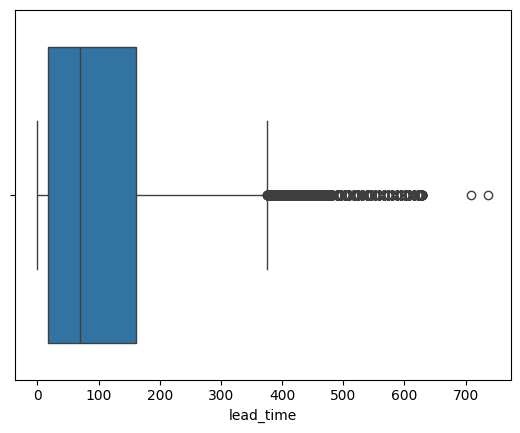

Number of outliers in adr: 3883


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for 'lead_time'
sns.boxplot(x=df['lead_time'])
plt.show()

# IQR method for outlier detection in 'adr'
Q1 = df['adr'].quantile(0.25)
Q3 = df['adr'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_adr = df[(df['adr'] < lower_bound) | (df['adr'] > upper_bound)]
print(f"Number of outliers in adr: {len(outliers_adr)}")

# Capping outliers in 'lead_time'
df['lead_time'] = df['lead_time'].clip(lower_bound, upper_bound)

Check for inconsistencies between related columns:
arrival_date vs. reservation_status_date: Ensure reservation_status_date is not before arrival_date.
assigned_room_type vs. reserved_room_type: Check if they are the same or if there are logical reasons for differences.
adults, children, babies: Ensure the sum of these is non-negative.

In [20]:
# Check for inconsistent dates
inconsistent_dates = df[df['reservation_status_date'] < df['arrival_date']]
print(f"Number of inconsistent dates: {len(inconsistent_dates)}")

# Check for differences in room types
different_room_types = df[df['assigned_room_type'] != df['reserved_room_type']]
print(f"Number of different room types: {len(different_room_types)}")

# Check for negative total guests
df['total_guests'] = df['adults'] + df['children'] + df['babies']
negative_guests = df[df['total_guests'] < 0]
print(f"Number of negative total guests: {len(negative_guests)}")

# Remove rows with negative guests if they exist
df = df[df['total_guests'] >= 0]

Number of inconsistent dates: 42091
Number of different room types: 14699
Number of negative total guests: 0


In [21]:
# Create a flag for inconsistent dates
df['inconsistent_dates'] = (df['reservation_status_date'] < df['arrival_date']).astype(int)

# Analyze the inconsistent dates (optional)
inconsistent_dates = df[df['inconsistent_dates'] == 1]
print(f"Number of inconsistent dates: {len(inconsistent_dates)}")

# Analyze the inconsistent dates by hotel type (optional)
print(inconsistent_dates['hotel'].value_counts())

# Analyze the inconsistent dates by market segment (optional)
print(inconsistent_dates['market_segment'].value_counts())

# Analyze the inconsistent dates by reservation status (optional)
print(inconsistent_dates['reservation_status'].value_counts())

# If you decide to remove inconsistent rows (not recommended due to data loss):
# df = df[df['inconsistent_dates'] == 0]

Number of inconsistent dates: 42091
hotel
City Hotel      31617
Resort Hotel    10474
Name: count, dtype: int64
market_segment
Online TA        19848
Groups           11971
Offline TA/TO     7952
Direct            1450
Corporate          790
Complementary       47
Aviation            31
Undefined            2
Name: count, dtype: int64
reservation_status
Canceled    42090
No-Show         1
Name: count, dtype: int64


Explanation:

We create a new column inconsistent_dates that is 1 if reservation_status_date is before arrival_date, and 0 otherwise.
We print the count of inconsistent dates.
We provide optional examples of analyzing the inconsistent dates by hotel, market_segment, and reservation_status. This can help you understand if there are patterns in these inconsistencies.
We comment out the code to remove the inconsistent rows. If you decide to remove these rows, uncomment the last line.

In [22]:
# Create a flag for different room types
df['different_room_types'] = (df['assigned_room_type'] != df['reserved_room_type']).astype(int)

# Analyze the different room types (optional)
different_room_types = df[df['different_room_types'] == 1]
print(f"Number of different room types: {len(different_room_types)}")

# Example: Analyze the different room types by hotel type (optional)
print(different_room_types['hotel'].value_counts())

# Example: Analyze the different room types by market segment (optional)
print(different_room_types['market_segment'].value_counts())

# Example: Analyze the different room types by deposit type (optional)
print(different_room_types['deposit_type'].value_counts())

# Example: Analyze the different room types, and assigned vs reserved (optional)
print(different_room_types[['assigned_room_type', 'reserved_room_type']].head())

Number of different room types: 14699
hotel
Resort Hotel    7507
City Hotel      7192
Name: count, dtype: int64
market_segment
Online TA        5478
Offline TA/TO    3610
Direct           2074
Groups           1891
Corporate        1383
Complementary     243
Aviation           20
Name: count, dtype: int64
deposit_type
No Deposit    14575
Non Refund       88
Refundable       36
Name: count, dtype: int64
   assigned_room_type reserved_room_type
2                   C                  A
12                  E                  D
15                  E                  D
17                  E                  A
18                  G                  A


Explanation:

We create a new column different_room_types that is 1 if assigned_room_type is different from reserved_room_type, and 0 otherwise.
We print the count of different room types.
We provide optional examples of analyzing the different room types by hotel, market_segment, and deposit_type. This can help you understand why room types might be different.
We also show the first few rows of the assigned vs reserved room types.

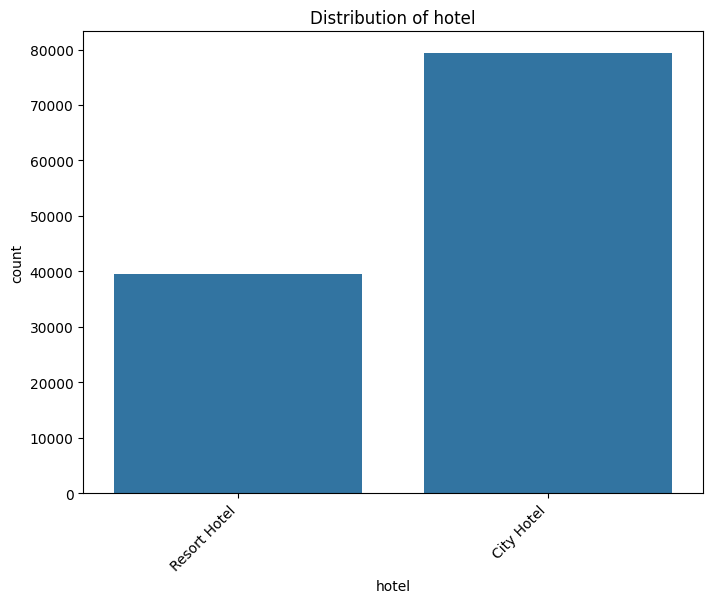

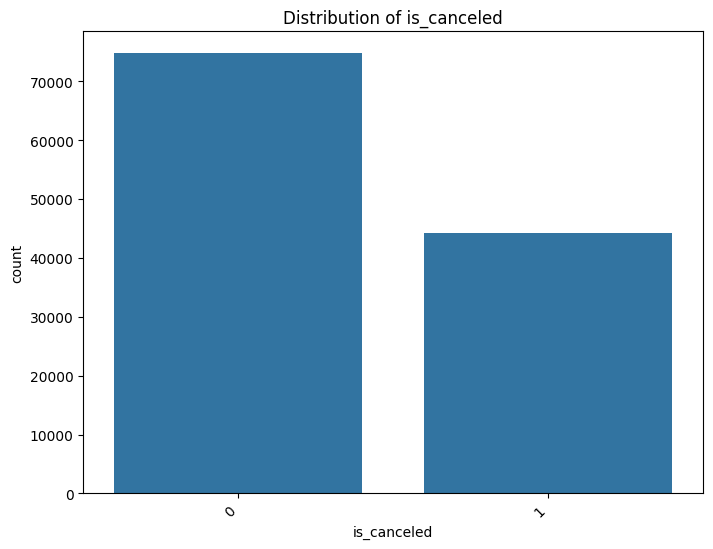

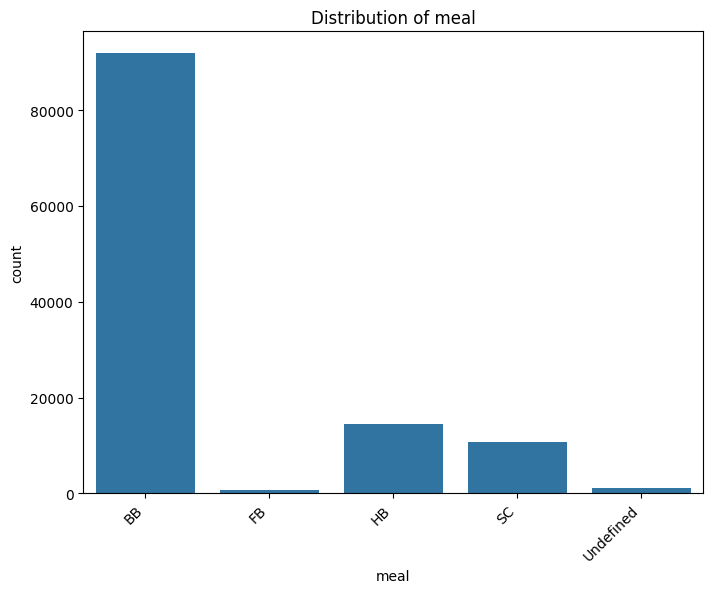

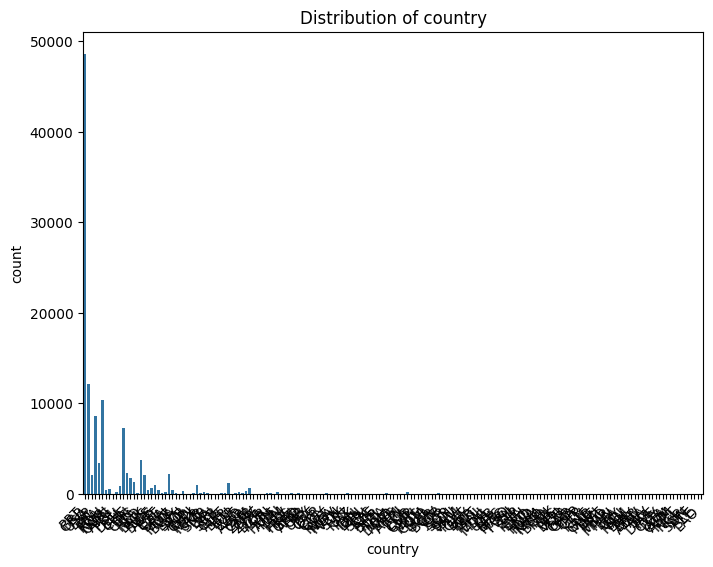

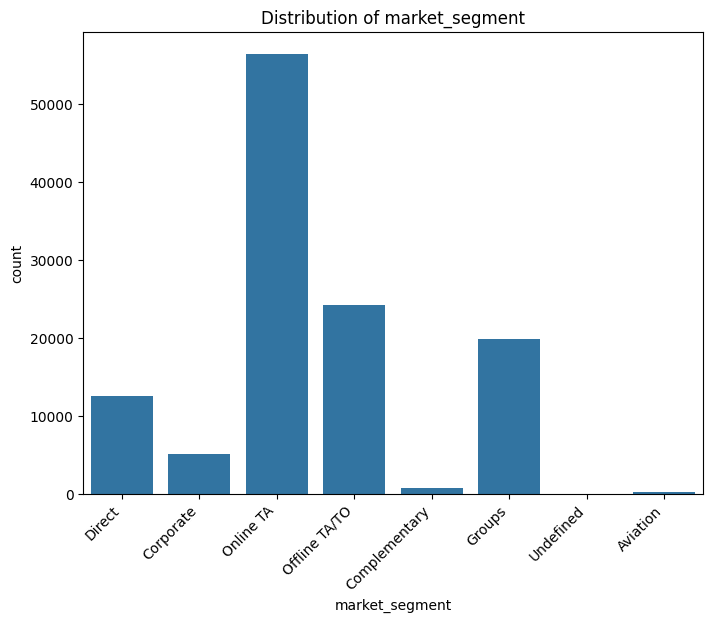

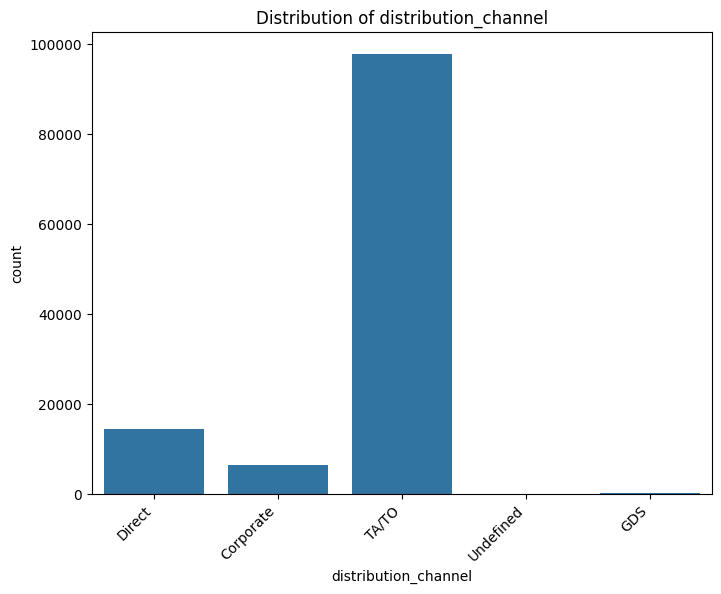

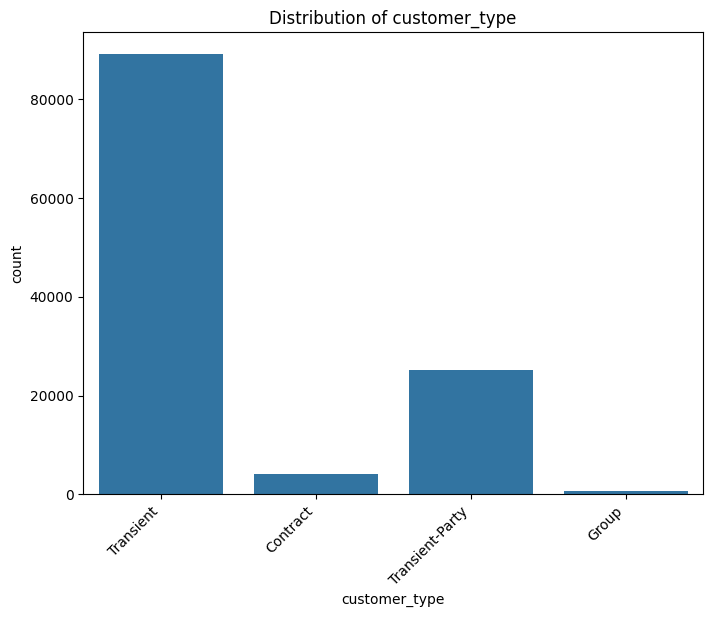

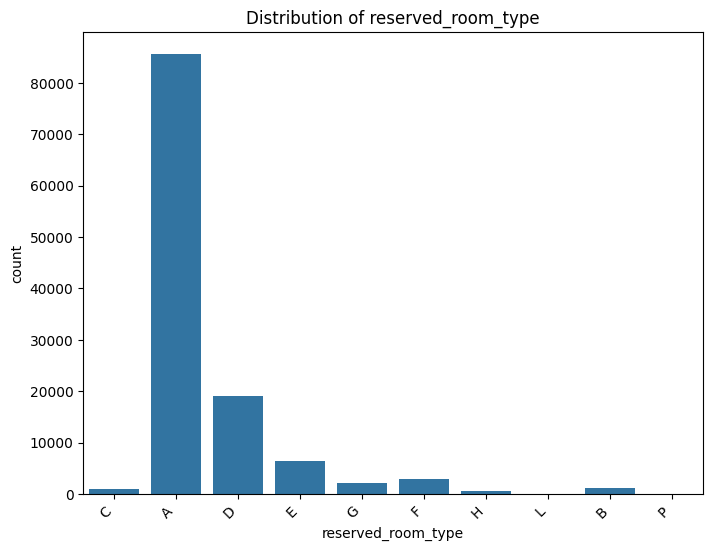

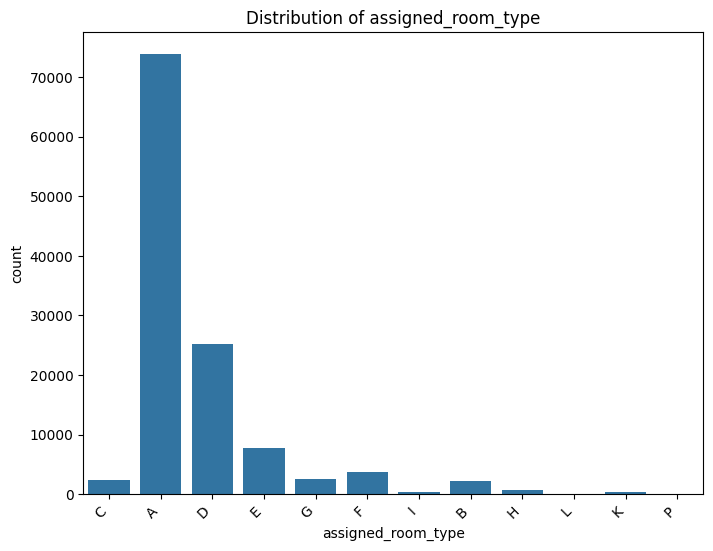

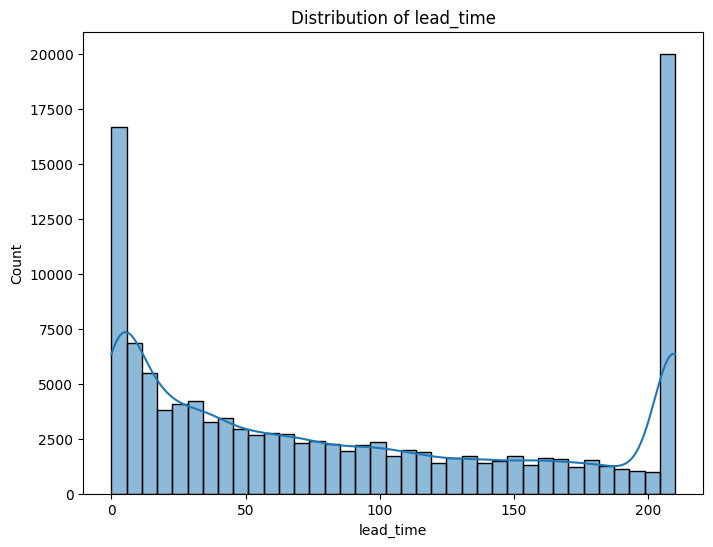

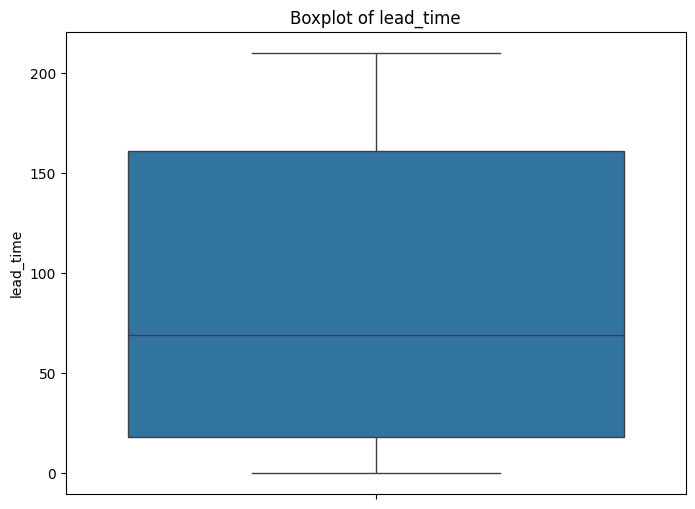

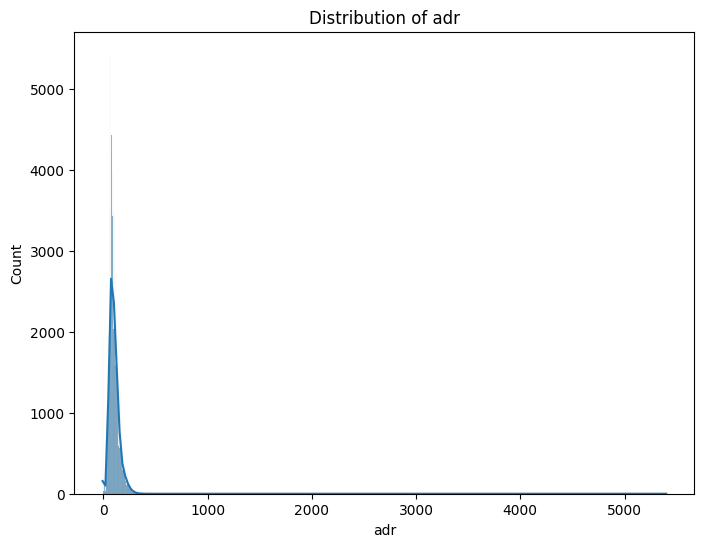

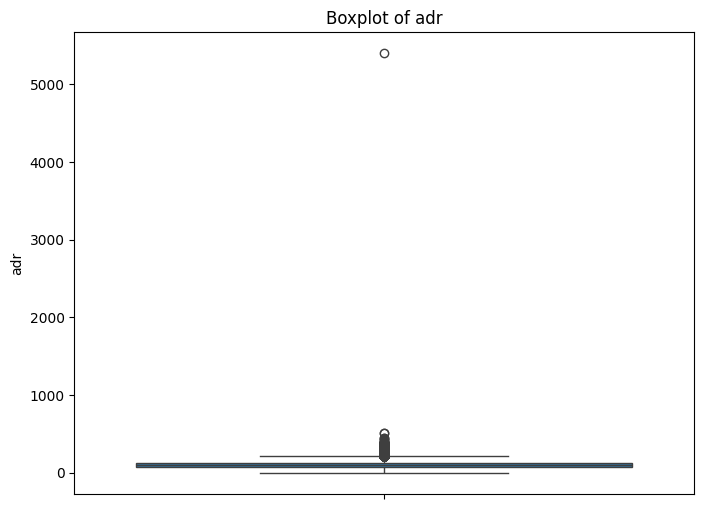

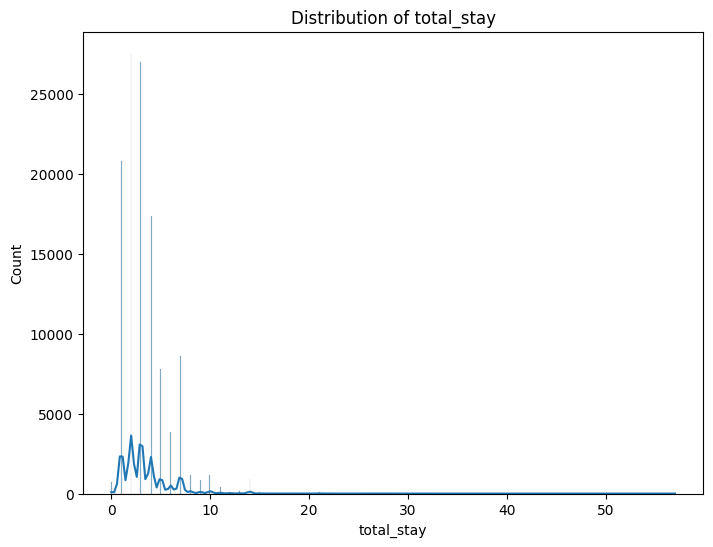

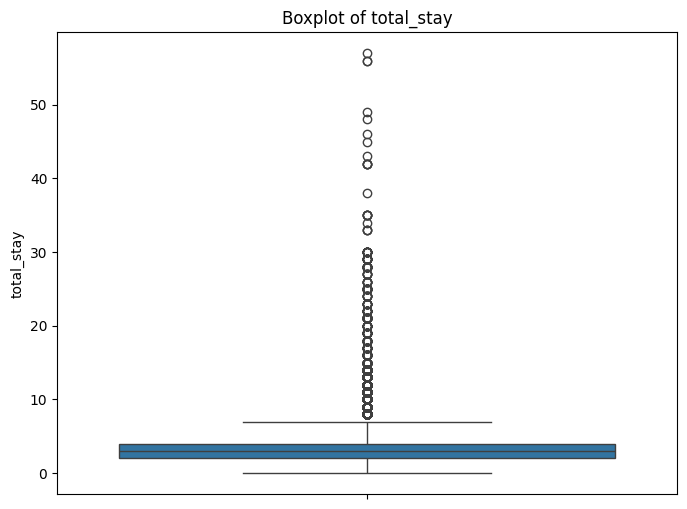

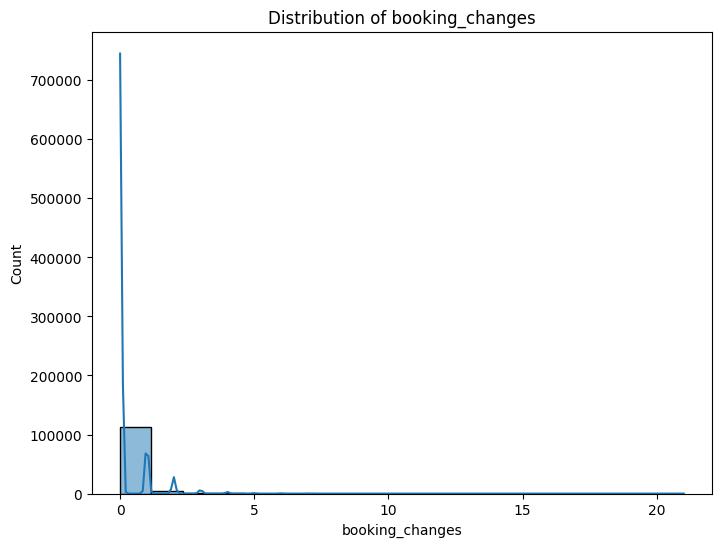

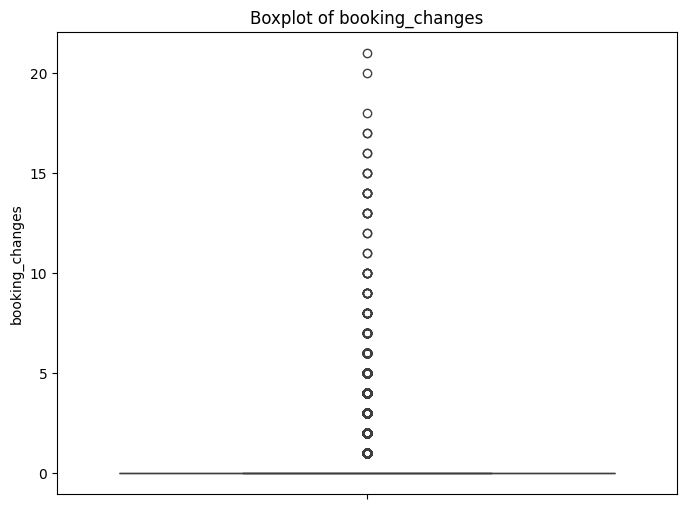

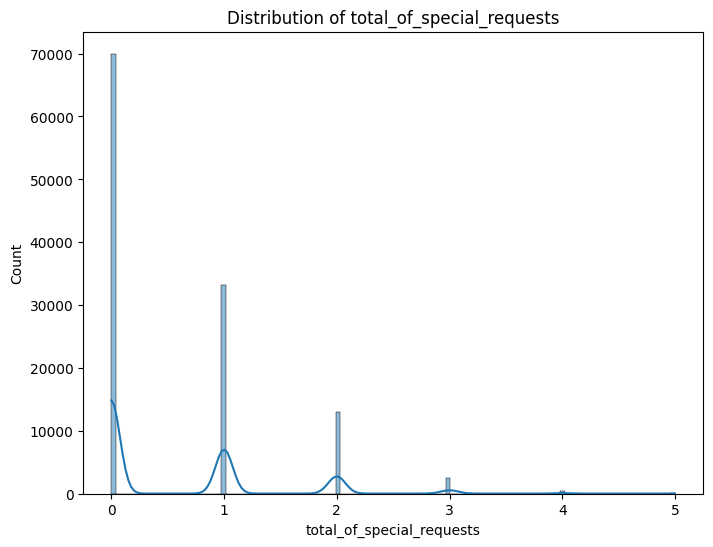

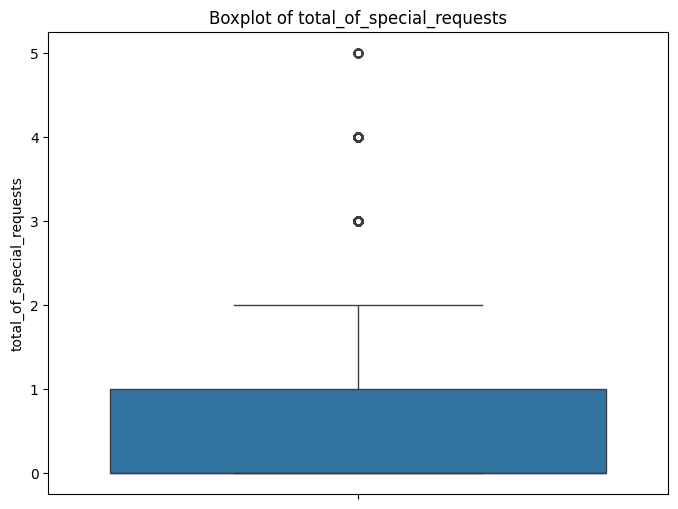

In [25]:
# Create 'total_stay' column
df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Univariate Analysis (Categorical)
categorical_cols = ['hotel', 'is_canceled', 'meal', 'country', 'market_segment', 'distribution_channel', 'customer_type', 'reserved_room_type', 'assigned_room_type']
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')
    plt.show()


# Univariate Analysis (Numerical)
numerical_cols = ['lead_time', 'adr', 'total_stay', 'booking_changes', 'total_of_special_requests']
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

 Bivariate Analysis

Categorical vs. Categorical:

Cancellation rate by hotel type: is_canceled vs. hotel
Cancellation rate by market segment: is_canceled vs. market_segment
Meal preferences by hotel type: meal vs. hotel
Customer type by hotel type: customer_type vs. hotel
Categorical vs. Numerical:

ADR by hotel type: hotel vs. adr
Lead time by hotel type: hotel vs. lead_time
ADR by market segment: market_segment vs. adr
Length of stay by hotel type: hotel vs. total_stay
Numerical vs. Numerical:

Correlation matrix: Check correlations between numerical features.
Scatter plots: Visualize relationships between pairs of numerical features (e.g., lead_time vs. adr).

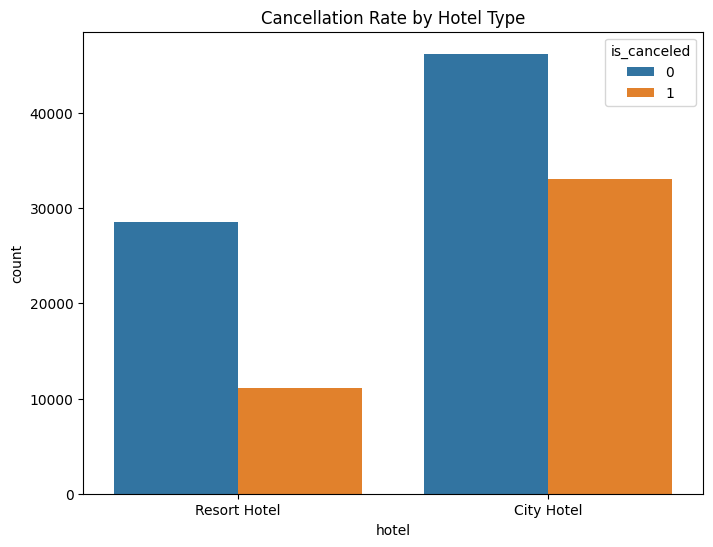

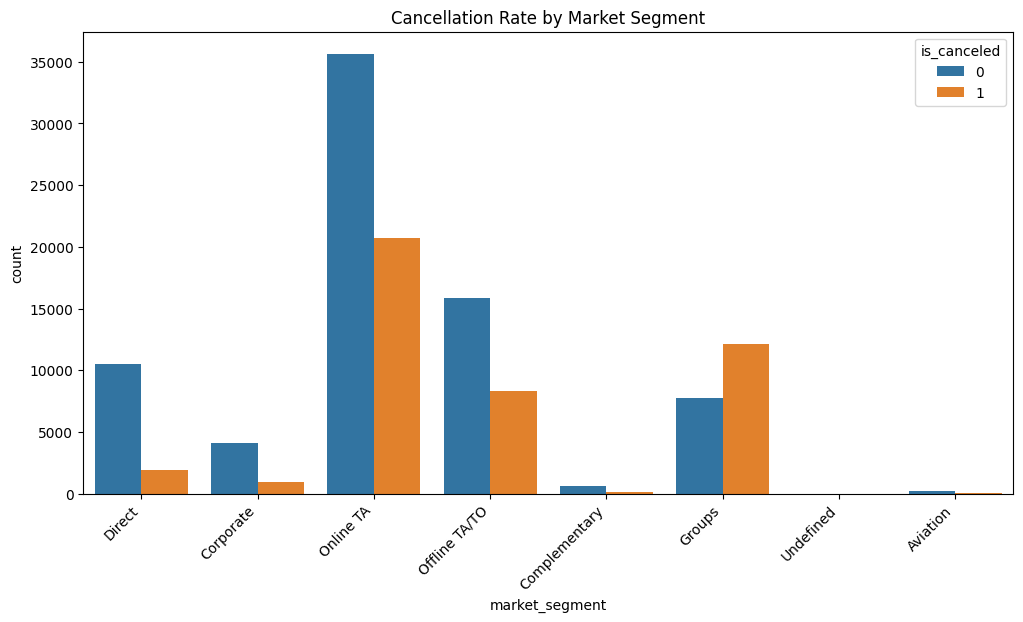

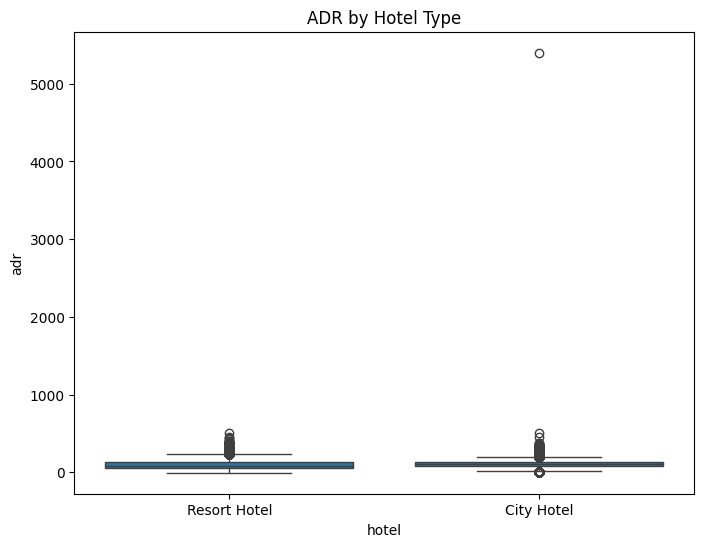

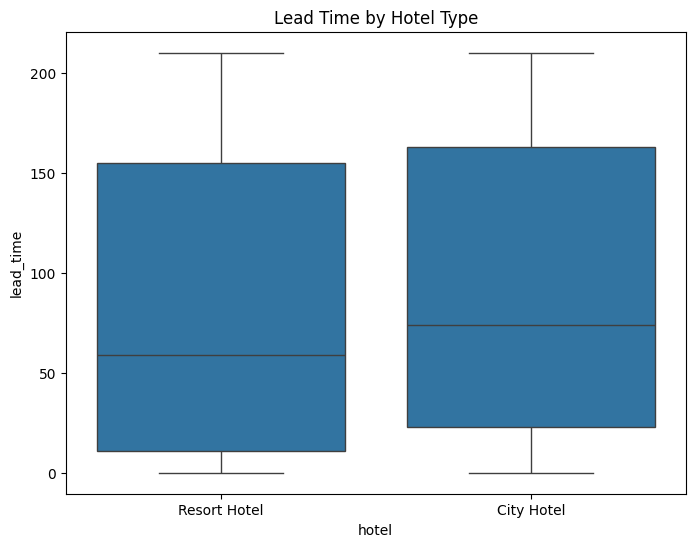

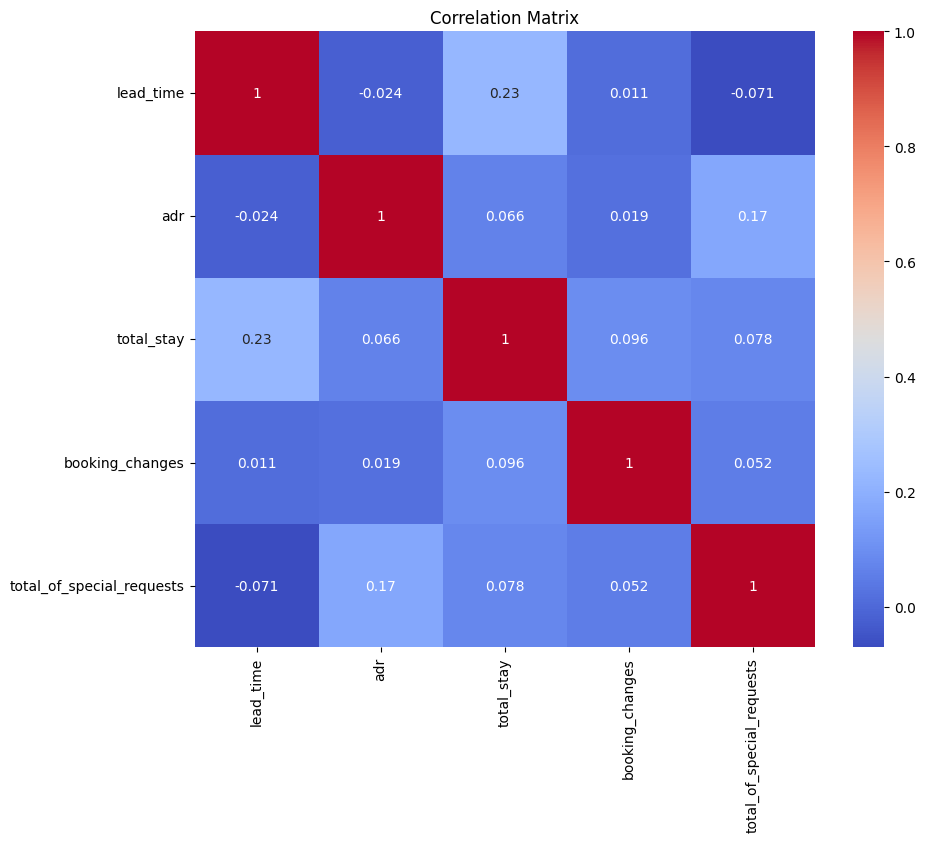

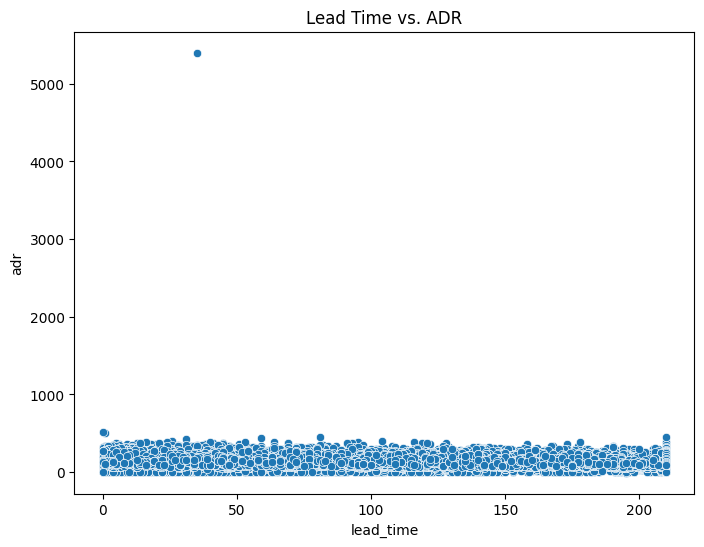

In [26]:
# Bivariate Analysis (Categorical vs. Categorical)
plt.figure(figsize=(8, 6))
sns.countplot(x='hotel', hue='is_canceled', data=df)
plt.title('Cancellation Rate by Hotel Type')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='market_segment', hue='is_canceled', data=df)
plt.title('Cancellation Rate by Market Segment')
plt.xticks(rotation=45, ha='right')
plt.show()

# Bivariate Analysis (Categorical vs. Numerical)
plt.figure(figsize=(8, 6))
sns.boxplot(x='hotel', y='adr', data=df)
plt.title('ADR by Hotel Type')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='hotel', y='lead_time', data=df)
plt.title('Lead Time by Hotel Type')
plt.show()

# Bivariate Analysis (Numerical vs. Numerical)
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='lead_time', y='adr', data=df)
plt.title('Lead Time vs. ADR')
plt.show()

Time Series Analysis

Booking volume over time: Analyze trends in booking volume over months or years.
ADR over time: Check for seasonal patterns in ADR.
Cancellation rates over time: See if cancellation rates change over time.




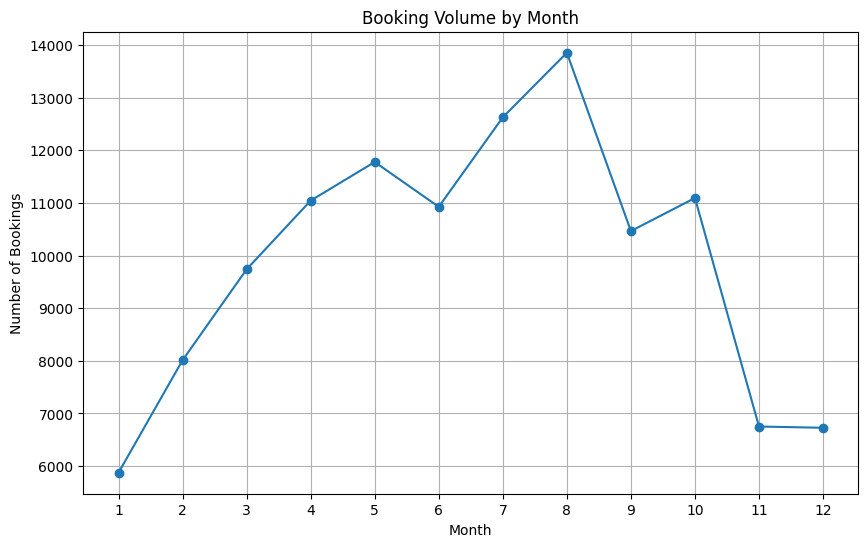

In [27]:
# Time Series Analysis (Example: Booking volume by month)
df['arrival_month'] = df['arrival_date'].dt.month
monthly_bookings = df['arrival_month'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
monthly_bookings.plot(kind='line', marker='o')
plt.title('Booking Volume by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

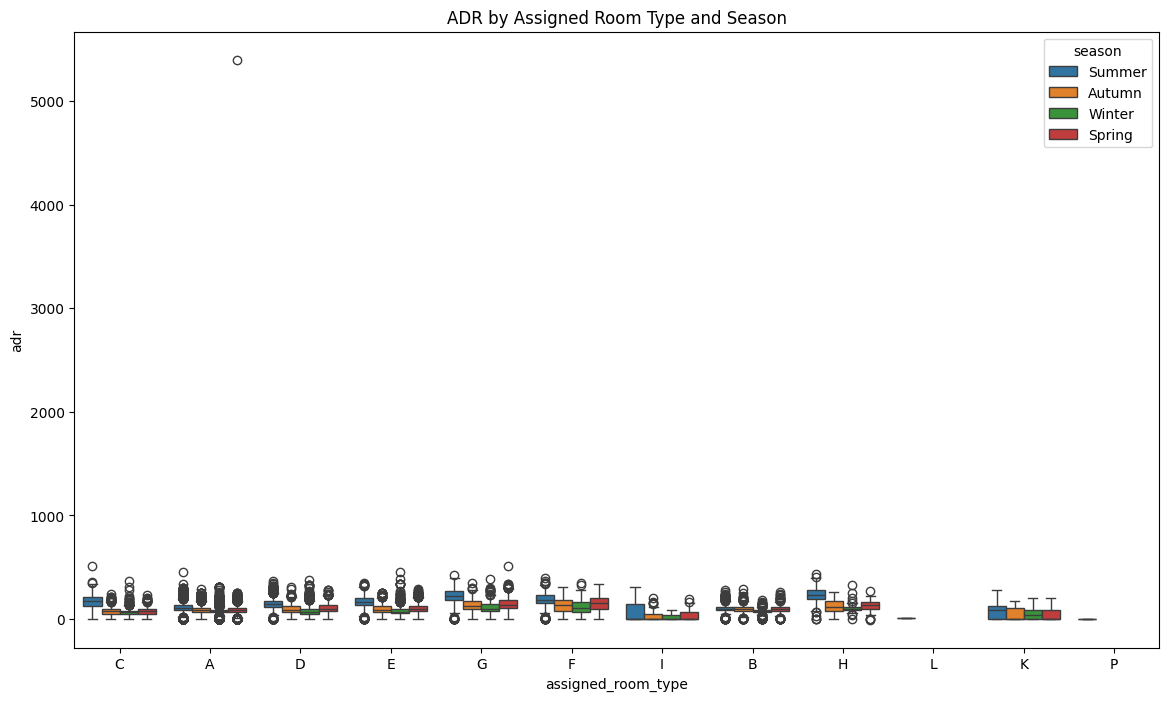

   assigned_room_type  season         adr
0                   A  Autumn   87.253642
1                   A  Spring   91.888674
2                   A  Summer  110.380028
3                   A  Winter   72.785306
4                   B  Autumn   95.926705
5                   B  Spring   95.589289
6                   B  Summer  101.684430
7                   B  Winter   76.961743
8                   C  Autumn   79.200156
9                   C  Spring   77.069433
10                  C  Summer  170.982287
11                  C  Winter   70.567852
12                  D  Autumn   94.387856
13                  D  Spring  103.576074
14                  D  Summer  143.570022
15                  D  Winter   74.565747
16                  E  Autumn   93.476739
17                  E  Spring  104.912352
18                  E  Summer  165.526656
19                  E  Winter   78.671950
20                  F  Autumn  130.929924
21                  F  Spring  145.007004
22                  F  Summer  187

In [28]:

# Create a 'season' column
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['season'] = df['arrival_date'].dt.month.apply(get_season)

# Analyze ADR by room type and season
plt.figure(figsize=(14, 8))
sns.boxplot(x='assigned_room_type', y='adr', hue='season', data=df)
plt.title('ADR by Assigned Room Type and Season')
plt.show()

# Optional: Calculate mean ADR by room type and season
adr_by_room_season = df.groupby(['assigned_room_type', 'season'])['adr'].mean().reset_index()
print(adr_by_room_season)

Explanation:

We define a function get_season to categorize months into seasons.
We create a season column using the arrival_date month.
We use a box plot to visualize the distribution of ADR by assigned_room_type and season.
We optionally calculate the mean ADR for each combination of room type and season


What Factors Influence the Length of Stay?

We'll use the total_stay column (which we created earlier) as the length of stay.
We'll analyze the relationship between total_stay and other relevant columns (e.g., hotel, market_segment, meal, is_repeated_guest, arrival_date_month).

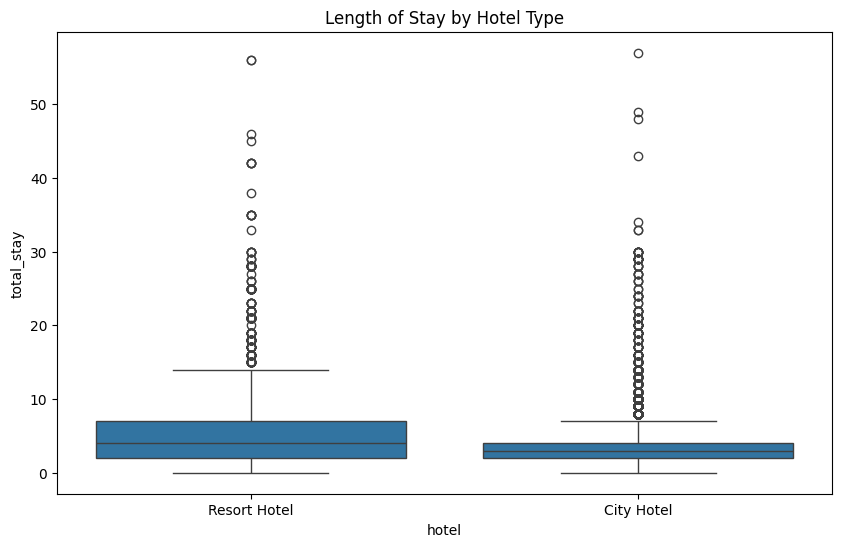

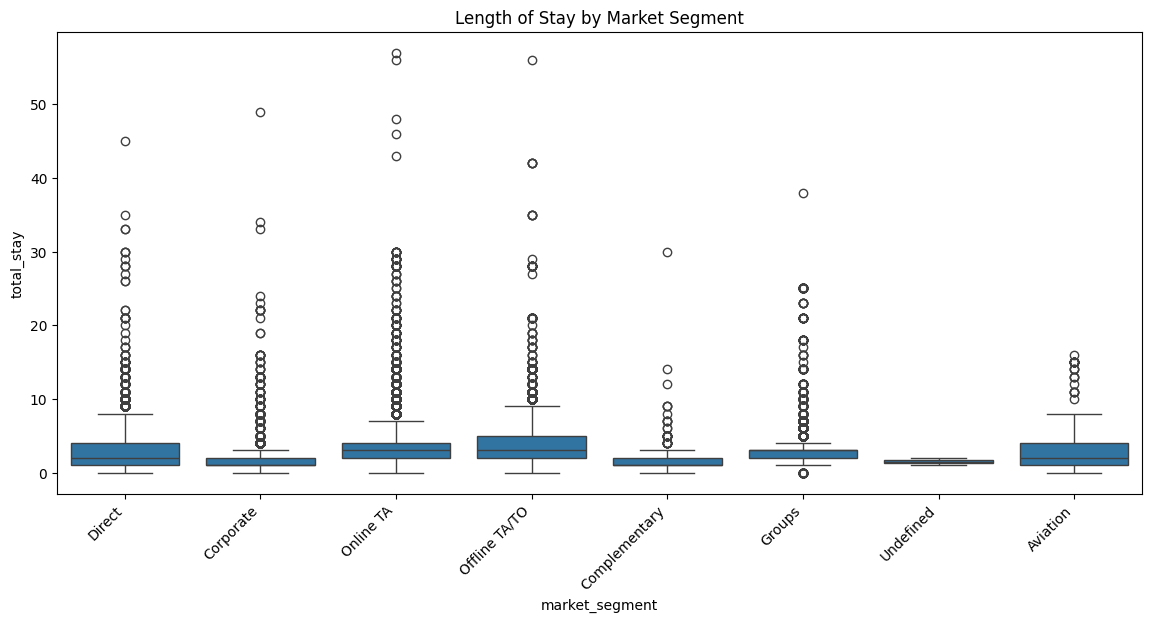

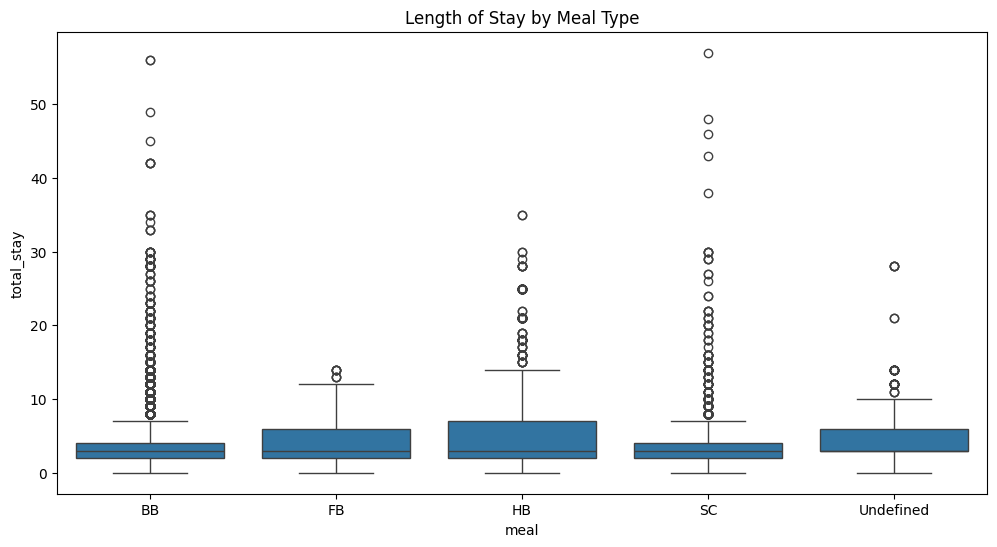

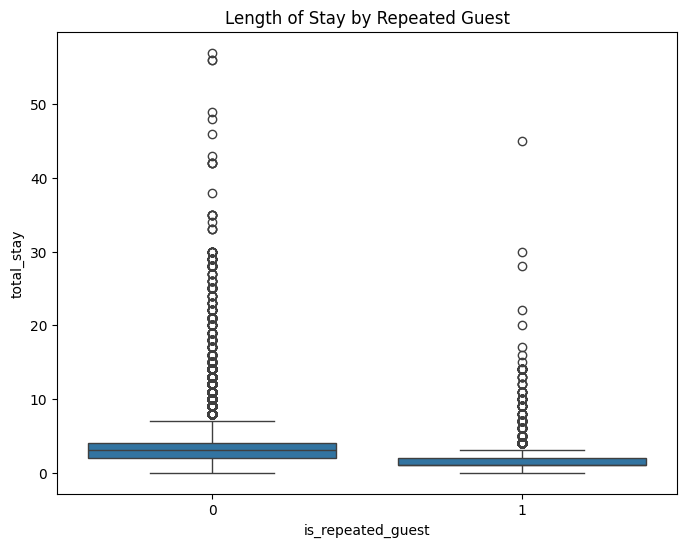

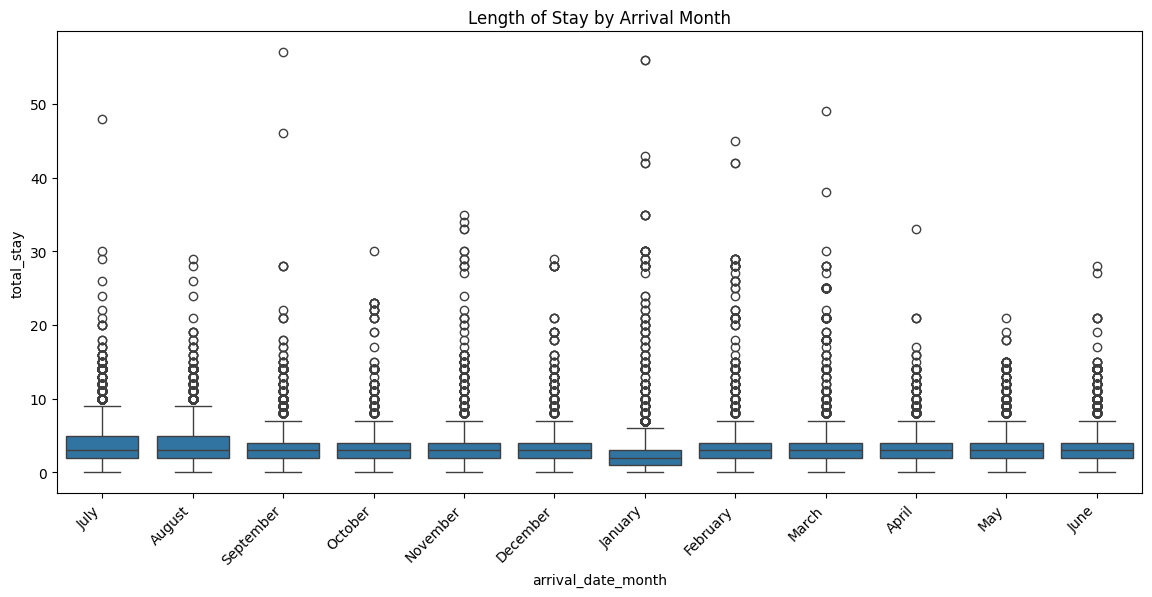

total_stay                        1.000000
stays_in_week_nights              0.940370
stays_in_weekend_nights           0.760957
lead_time                         0.225892
total_guests                      0.114517
adults                            0.104069
booking_changes                   0.095855
total_of_special_requests         0.077908
adr                               0.066044
children                          0.050830
arrival_date_year                 0.032199
babies                            0.022252
arrival_month                     0.020844
inconsistent_dates                0.020135
arrival_date_week_number          0.018110
is_canceled                       0.016963
previous_cancellations           -0.015749
days_in_waiting_list             -0.022973
required_car_parking_spaces      -0.025303
arrival_date_day_of_month        -0.026825
previous_bookings_not_canceled   -0.051257
different_room_types             -0.096001
is_repeated_guest                -0.107548
Name: total

In [30]:
# Analyze factors influencing length of stay
plt.figure(figsize=(10, 6))
sns.boxplot(x='hotel', y='total_stay', data=df)
plt.title('Length of Stay by Hotel Type')
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(x='market_segment', y='total_stay', data=df)
plt.title('Length of Stay by Market Segment')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='meal', y='total_stay', data=df)
plt.title('Length of Stay by Meal Type')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='is_repeated_guest', y='total_stay', data=df)
plt.title('Length of Stay by Repeated Guest')
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(x='arrival_date_month', y='total_stay', data=df)
plt.title('Length of Stay by Arrival Month')
plt.xticks(rotation=45, ha='right')
plt.show()

# Optional: Calculate correlation between numerical columns and total_stay
# Select only numerical features for correlation calculation
numerical_features = df.select_dtypes(include=['number'])
correlation = numerical_features.corr()['total_stay'].sort_values(ascending=False)
print(correlation)

Explanation:

We use box plots to visualize the relationship between total_stay and various categorical columns.
We optionally calculate the correlation between total_stay and numerical columns

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Select relevant features
features = ['lead_time', 'arrival_date_year', 'arrival_date_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'season']

# Handle categorical features (one-hot encoding)
df_encoded = pd.get_dummies(df[features], drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded, df['is_canceled'], test_size=0.2, random_state=42)

# Build a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(feature_importances.head(10))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91     14817
           1       0.89      0.81      0.85      8964

    accuracy                           0.89     23781
   macro avg       0.89      0.87      0.88     23781
weighted avg       0.89      0.89      0.89     23781

lead_time                    0.117958
adr                          0.083942
deposit_type_Non Refund      0.074693
country_PRT                  0.067988
total_of_special_requests    0.061300
stays_in_week_nights         0.044966
previous_cancellations       0.029549
stays_in_weekend_nights      0.029372
arrival_date_year            0.026137
booking_changes              0.021765
dtype: float64


We select relevant features for the model.
We use one-hot encoding to handle categorical features.
We split the data into training and testing sets.
We build a Random Forest classifier (you can experiment with other models).
We evaluate the model using a classification report.
We print the feature importances to see which features are most predictive of cancellations.

Answering Business Questions


*   
What are the peak booking months? (august)

*   
What is the average lead time for different hotel types? (155)

*   
Which market segments have the highest cancellation rates?(online)


*   
How does the average daily rate vary by room type and season?



*   
What factors influence the length of stay?

*   
Can we predict booking cancellations?


Seasonal Variation:

Summer Peaks: In almost all room types (A to H), the ADR is significantly higher during the summer season. This aligns with typical travel trends, where summer is often peak season.
Winter Lows: Conversely, the ADR is generally lowest during the winter months.
Spring and Autumn: ADRs in spring and autumn tend to be in between the summer and winter values.

Room Type Impact:

Higher-Tier Rooms: Room types F, G, and H consistently have the highest ADRs across all seasons. These are likely higher-tier rooms or suites.
Lower-Tier Rooms: Room types A, B, C, and D have lower ADRs compared to F, G, and H.
I and K: Room types I and K have very low ADRs. These might be special room types or promotional rates.
L and P: Room types L and P have extremely low ADRs, possibly indicating errors, special cases, or complementary rooms.

Specific Room Type Patterns:

Room C: Has a very large jump in ADR during the summer. This could indicate a special type of room or package that is only available during the summer.

## Implications and Recommendations

Pricing Strategy:

Dynamic Pricing: The hotel should implement dynamic pricing strategies that adjust ADRs based on seasonal demand.
Summer Packages: Consider creating special summer packages or promotions to capitalize on the high demand.
Winter Promotions: Offer winter promotions or discounts to attract guests during the off-season.

Room Inventory Management:

Summer Optimization: Ensure sufficient inventory of higher-tier rooms (F, G, H) during the summer.
Winter Demand: Understand the demand for lower-tier rooms during the winter.
Room Type Analysis:

Investigate I, K, L, and P: Investigate the reasons for the extremely low ADRs in these room types. They might be errors, special cases, or complementary rooms.
Analyze Room C: Understand why room type C has such a large ADR increase in the summer.
Marketing and Sales:

Targeted Promotions: Develop targeted marketing campaigns for each season and room type.
Highlight Room Differences: Emphasize the differences between room types (e.g., amenities, views) in marketing materials.

# **let's start with a deeper dive into cancellation patterns. We'll focus on time-based analysis and segmented analysis to uncover more insights.**

1. Time-Based Analysis

We'll examine cancellation rates over time and the time difference between booking and cancellation.



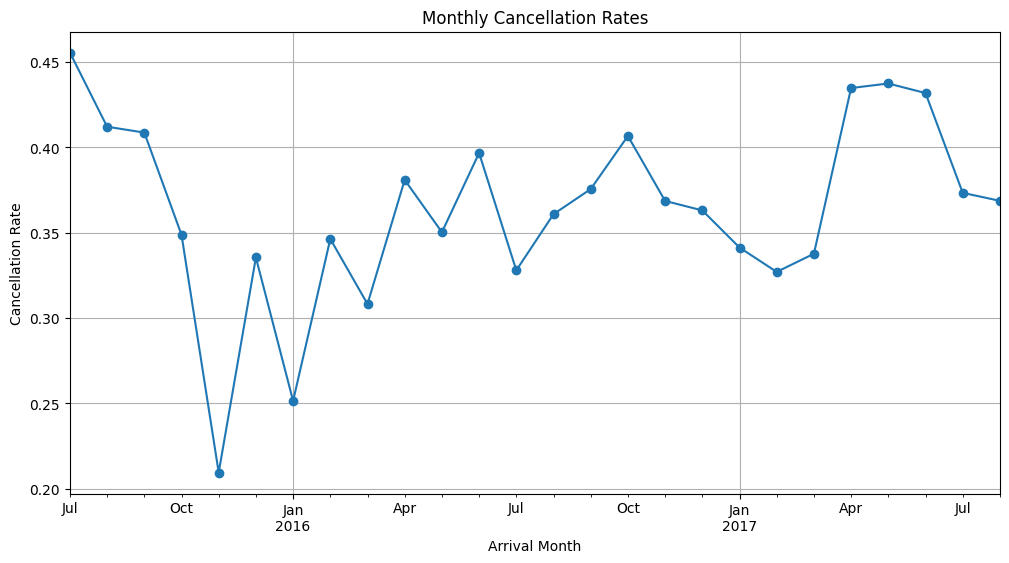

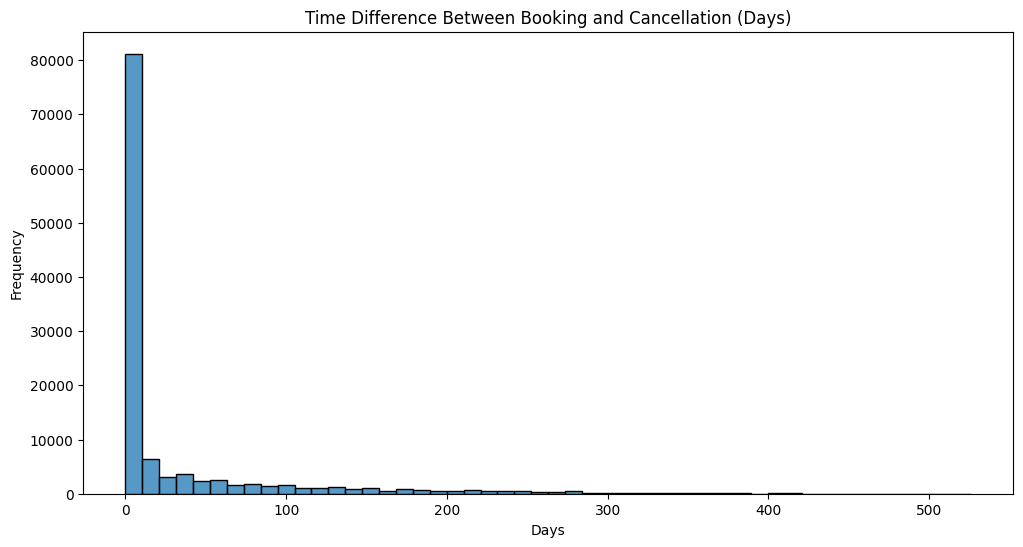

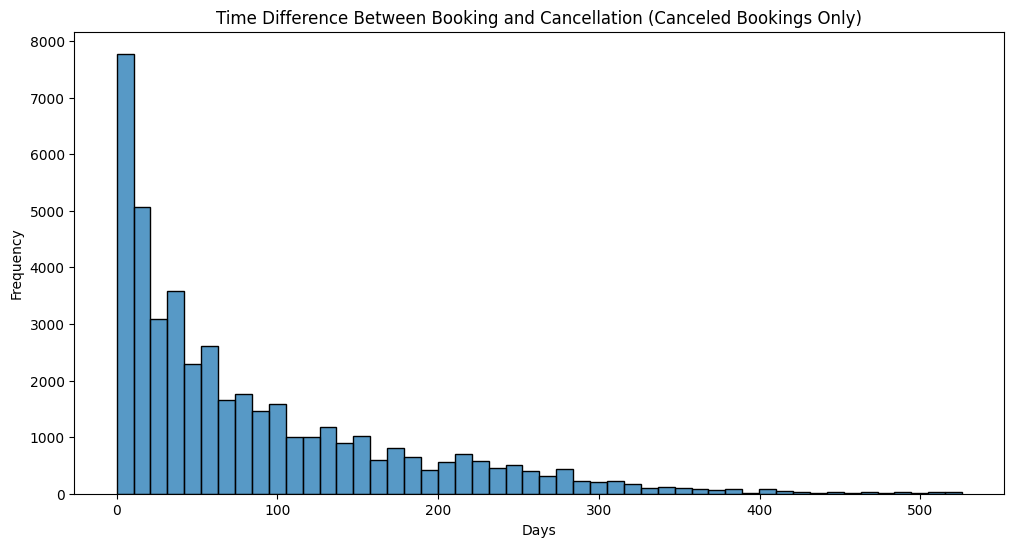

In [32]:
# Convert arrival_date and reservation_status_date to datetime if not already done
df['arrival_date'] = pd.to_datetime(df['arrival_date'], errors='coerce')
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], errors='coerce')

# Monthly Cancellation Rates
df['arrival_month'] = df['arrival_date'].dt.to_period('M')  # Extract year-month
monthly_cancellation_rates = df.groupby('arrival_month')['is_canceled'].mean()

plt.figure(figsize=(12, 6))
monthly_cancellation_rates.plot(marker='o')
plt.title('Monthly Cancellation Rates')
plt.xlabel('Arrival Month')
plt.ylabel('Cancellation Rate')
plt.grid(True)
plt.show()

# Time Difference Between Booking and Cancellation
df['cancellation_time_diff'] = (df['reservation_status_date'] - df['arrival_date']).dt.days.abs()  # Absolute difference in days
plt.figure(figsize=(12, 6))
sns.histplot(df['cancellation_time_diff'], bins=50)
plt.title('Time Difference Between Booking and Cancellation (Days)')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()

# Time Difference for Canceled Bookings Only
canceled_time_diff = df[df['is_canceled'] == 1]['cancellation_time_diff']
plt.figure(figsize=(12, 6))
sns.histplot(canceled_time_diff, bins=50)
plt.title('Time Difference Between Booking and Cancellation (Canceled Bookings Only)')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()

2. Segmented Analysis

We'll explore cancellation patterns within specific market segments and hotel types.



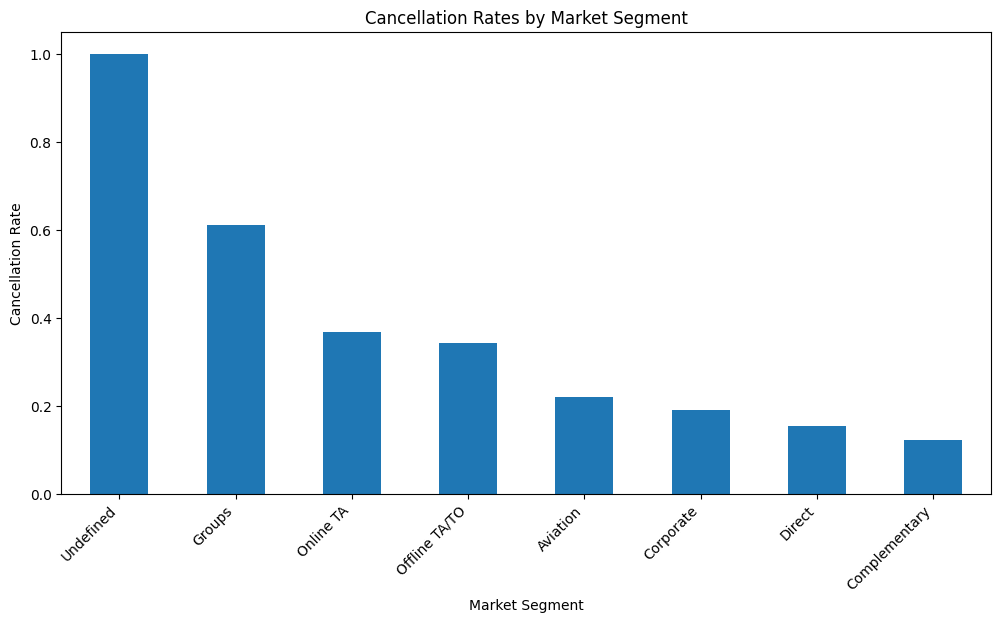

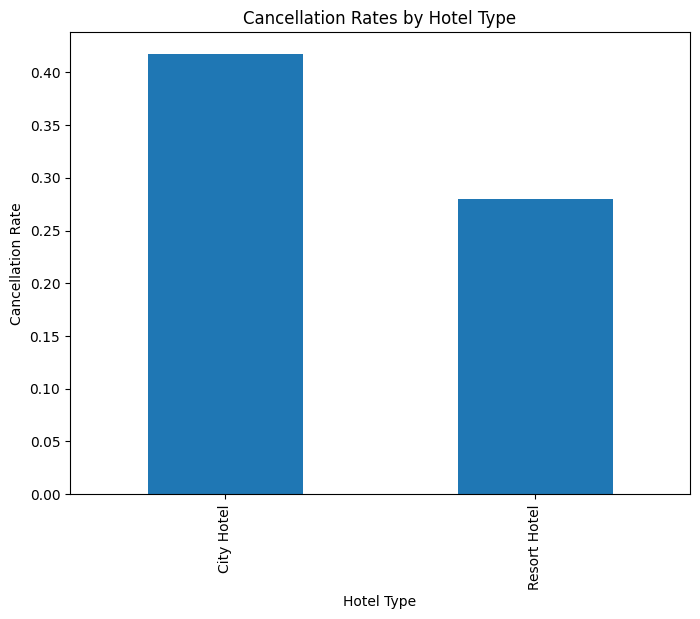

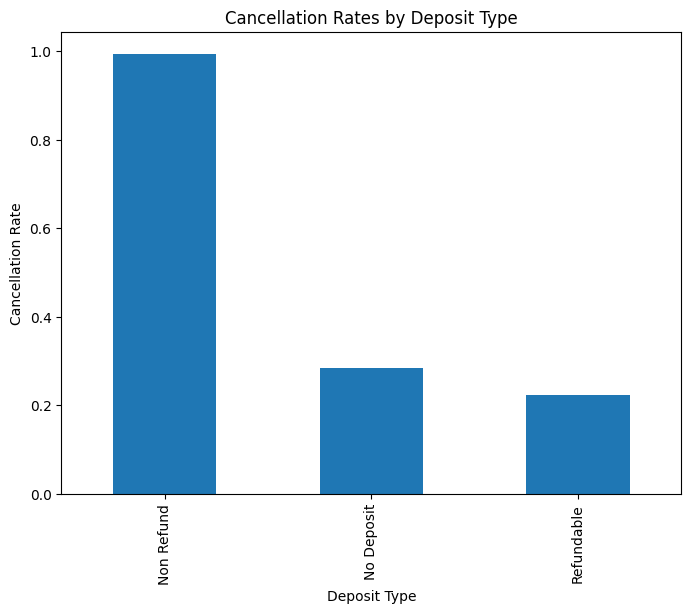

In [33]:
# Cancellation Rates by Market Segment
market_segment_cancellation_rates = df.groupby('market_segment')['is_canceled'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
market_segment_cancellation_rates.plot(kind='bar')
plt.title('Cancellation Rates by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45, ha='right')
plt.show()

# Cancellation Rates by Hotel Type
hotel_cancellation_rates = df.groupby('hotel')['is_canceled'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
hotel_cancellation_rates.plot(kind='bar')
plt.title('Cancellation Rates by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Cancellation Rate')
plt.show()

# Cancellation Rates by Deposit Type
deposit_cancellation_rates = df.groupby('deposit_type')['is_canceled'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
deposit_cancellation_rates.plot(kind='bar')
plt.title('Cancellation Rates by Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Cancellation Rate')
plt.show()

Identify Key Observations and Patterns:


1.   High Cancellation Rate in July:
Possible causes: Peak season, summer travel plans, specific events, pricing.

2.   Last-Minute Cancellations (0-10 days):
Possible causes: Sudden changes, no-shows, hotel policies, online bookings.

3.   High Cancellations in "Undefined" and "Groups" Market Segments:
Possible causes: Data quality issues, group coordination, payment issues, event changes.



Hypothesis 1: July Cancellations

We'll use a t-test to compare the cancellation rate in July to the cancellation rate in other months.

In [34]:
import scipy.stats as stats

# Create a boolean column for July bookings
df['is_july'] = (df['arrival_date'].dt.month == 7).astype(int)

# Separate cancellation rates for July and other months
july_cancellations = df[df['is_july'] == 1]['is_canceled']
other_cancellations = df[df['is_july'] == 0]['is_canceled']

# Perform t-test
t_stat, p_value = stats.ttest_ind(july_cancellations, other_cancellations)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis. July cancellations are significantly different.")
else:
    print("Fail to reject the null hypothesis. No significant difference.")

T-statistic: 0.9019861240689641
P-value: 0.36706606596841496
Fail to reject the null hypothesis. No significant difference.


Hypothesis 8: Group Bookings

We'll use a t-test to compare the cancellation rate for group bookings to the cancellation rate for non-group bookings. We need a way to define group bookings, for example, based on market segment.

In [35]:
# Create a boolean column for group bookings (example: market segment "Groups")
df['is_group'] = (df['market_segment'] == 'Groups').astype(int)

# Separate cancellation rates for group and non-group bookings
group_cancellations = df[df['is_group'] == 1]['is_canceled']
non_group_cancellations = df[df['is_group'] == 0]['is_canceled']

# Perform t-test
t_stat, p_value = stats.ttest_ind(group_cancellations, non_group_cancellations)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis. Group bookings have significantly different cancellation rates.")
else:
    print("Fail to reject the null hypothesis. No significant difference.")

T-statistic: 78.32698475768922
P-value: 0.0
Reject the null hypothesis. Group bookings have significantly different cancellation rates.


3. Hypothesis 4: Last-Minute Cancellations

We'll calculate the proportion of cancellations that occur within 10 days of the arrival date.

In [36]:
# Calculate time difference between booking and cancellation
df['cancellation_time_diff'] = (df['reservation_status_date'] - df['arrival_date']).dt.days.abs()

# Calculate proportion of last-minute cancellations
last_minute_cancellations = df[(df['is_canceled'] == 1) & (df['cancellation_time_diff'] <= 10)]
proportion_last_minute = len(last_minute_cancellations) / len(df[df['is_canceled'] == 1])

print(f"Proportion of last-minute cancellations: {proportion_last_minute}")

Proportion of last-minute cancellations: 0.1760989197635709


 Group Bookings Analysis

Segmentation (if applicable):
If you have additional information about group bookings (e.g., group size, event type, booking agent), use it to segment the data.
For example, you could create a new column to categorize group bookings based on size.
If you don't have this, we will use the market segment "Groups" as the only segment.

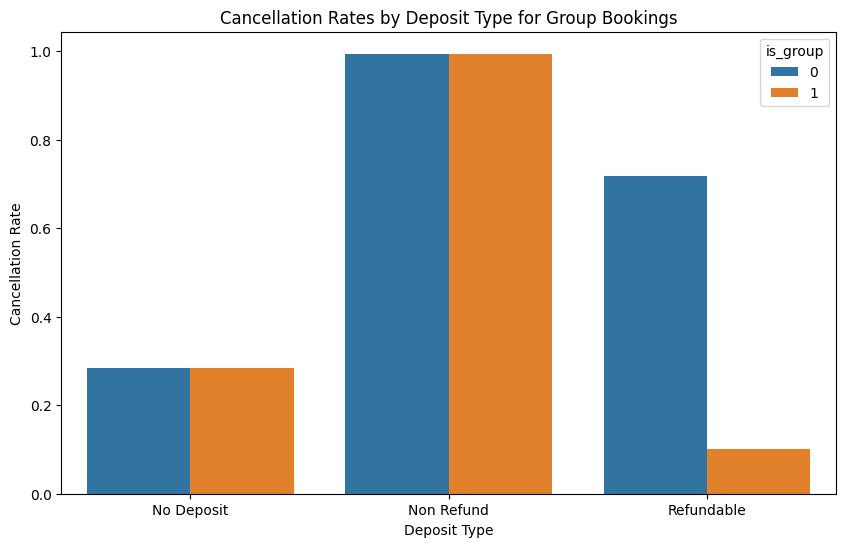

   is_group   lead_time
0         0   79.660894
1         1  139.393972


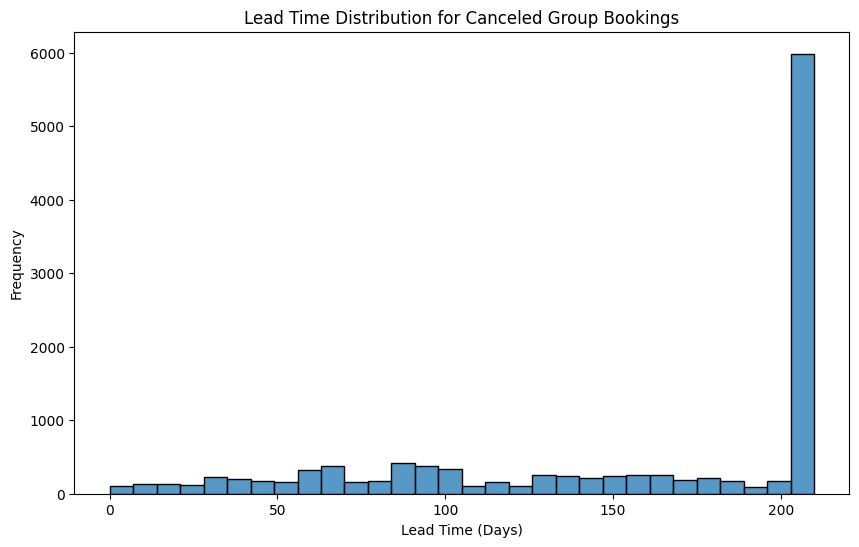

In [37]:
# Create a boolean column for group bookings
df['is_group'] = (df['market_segment'] == 'Groups').astype(int)

# Payment Analysis
group_payment_cancellations = df.groupby(['is_group', 'deposit_type'])['is_canceled'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='deposit_type', y='is_canceled', hue='is_group', data=group_payment_cancellations)
plt.title('Cancellation Rates by Deposit Type for Group Bookings')
plt.xlabel('Deposit Type')
plt.ylabel('Cancellation Rate')
plt.show()

# Lead Time Analysis
group_lead_time_cancellations = df.groupby('is_group')['lead_time'].mean().reset_index()
print(group_lead_time_cancellations)

# Lead Time Distribution for Canceled Group Bookings
canceled_group_lead_time = df[(df['is_canceled'] == 1) & (df['is_group'] == 1)]['lead_time']
plt.figure(figsize=(10, 6))
sns.histplot(canceled_group_lead_time, bins=30)
plt.title('Lead Time Distribution for Canceled Group Bookings')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Frequency')
plt.show()

# Communication Analysis (if applicable)
# If you have data on communication, analyze it here.

Last-Minute Cancellations Analysis

Reason Analysis (if applicable):
If you have data on cancellation reasons, analyze the frequency of different reasons.
If you don't have this, we will skip it.
Booking Channel Analysis:
Analyze if last-minute cancellations are more common for specific booking channels.

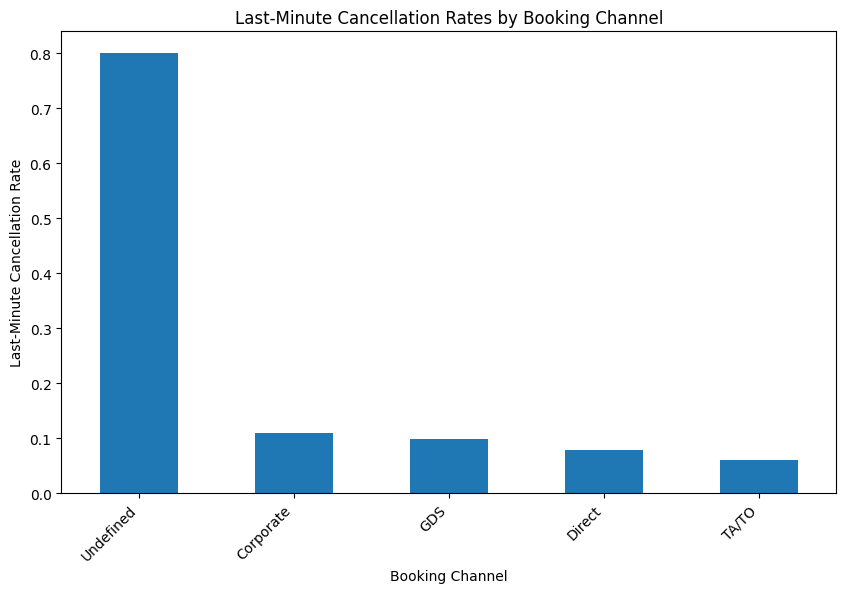

  reservation_status  is_last_minute
0           Canceled        0.153047
1          Check-Out        0.000000
2            No-Show        0.999169
   is_last_minute         adr
0               0  101.920389
1               1  103.150064


In [38]:
# Calculate time difference between booking and cancellation
df['cancellation_time_diff'] = (df['reservation_status_date'] - df['arrival_date']).dt.days.abs()

# Create a boolean column for last-minute cancellations (within 10 days)
df['is_last_minute'] = ((df['is_canceled'] == 1) & (df['cancellation_time_diff'] <= 10)).astype(int)

# Booking Channel Analysis
last_minute_channel_cancellations = df.groupby('distribution_channel')['is_last_minute'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
last_minute_channel_cancellations.plot(kind='bar')
plt.title('Last-Minute Cancellation Rates by Booking Channel')
plt.xlabel('Booking Channel')
plt.ylabel('Last-Minute Cancellation Rate')
plt.xticks(rotation=45, ha='right')
plt.show()

# No-Show Analysis
no_show_cancellations = df.groupby('reservation_status')['is_last_minute'].mean().reset_index()
print(no_show_cancellations)

# ADR Analysis
last_minute_adr = df.groupby('is_last_minute')['adr'].mean().reset_index()
print(last_minute_adr)